#  Various packages

In [46]:
import sys
import numpy as np
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt

#from numpy.core.umath_tests import inner1d
# modelos

from sklearn.svm import SVC
from matplotlib import pyplot
from collections import Counter
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.ensemble import  ExtraTreesClassifier,VotingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, roc_curve, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier


from sklearn.metrics import accuracy_score,roc_auc_score, f1_score,classification_report,precision_score,recall_score
from sklearn.model_selection import cross_val_score,  RepeatedStratifiedKFold,RandomizedSearchCV, GridSearchCV



# Importing data

In [7]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [8]:
data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Pre-processing  

In [9]:
# Data1 : without id
data = data.drop(['id'], axis=1)

In [10]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
data.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [13]:
label = [1,2,3,4,5]
data["age_mean"] = pd.cut(data["age"], 5, labels = label)
data["age_mean"].value_counts()
# Age stages were divided into five groups and the mean bmi was calculated separately
bmi_group = data.groupby("age_mean")["bmi"].mean() 
bmi_group

age_mean
1    20.787661
2    28.601332
3    31.425088
4    31.580618
5    29.415118
Name: bmi, dtype: float64

In [14]:
#Give bmi mean age-specific assignments
def bmi_val(cols): 
    bmi = cols[0]
    age_mean = cols[1]
    
    if pd.isnull(bmi):
        if age_mean == 1:
            return 20.7
        elif age_mean == 2:
            return 28.6
        elif age_mean == 3:
            return 31.4
        elif age_mean == 4:
            return 31.6
        elif age_mean == 5:
            return 29.4
    else:
        return bmi

In [15]:
data["bmi"] = data[["bmi","age_mean"]].apply(bmi_val, axis=1)

In [16]:
data.isnull().sum() 

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
age_mean             0
dtype: int64

In [18]:
#Change other to Female
data.gender = data.gender.apply(lambda x: 0 
                                if ((x == 'Female') or (x == 'Other')) 
                                else 1)

In [19]:
data.gender.value_counts()

1    5110
Name: gender, dtype: int64

In [12]:
data['age'] = data['age'].apply(lambda x: round(x))
data['age']

0       67
1       61
2       80
3       49
4       79
        ..
5105    80
5106    81
5107    35
5108    51
5109    44
Name: age, Length: 5110, dtype: int64

In [13]:
Feature = data.columns
Feature

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'age_mean'],
      dtype='object')

# Data type conversion

In [ ]:
# transformer = ColumnTransformer(transformers=[('imp',SimpleImputer(strategy='median'),numerical),('o',OneHotEncoder(),categorical)])
# pipeline = Pipeline(steps=[('t', transformer),('p',PowerTransformer(method='yeo-johnson')),('m', LR)])    
# scores = evaluate_model(X, y, pipeline)
# # results.append(scores)
# # print('>%s %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))
# scores

In [20]:
data.select_dtypes('object')

,ever_married,work_type,Residence_type,smoking_status
0,Yes,Private,Urban,formerly smoked
1,Yes,Self-employed,Rural,never smoked
2,Yes,Private,Rural,never smoked
3,Yes,Private,Urban,smokes
4,Yes,Self-employed,Rural,never smoked
...,...,...,...,...
5105,Yes,Private,Urban,never smoked
5106,Yes,Self-employed,Urban,never smoked
5107,Yes,Self-employed,Rural,never smoked
5108,Yes,Private,Rural,formerly smoked


# The latest changes


In [21]:
data.select_dtypes('object')

,ever_married,work_type,Residence_type,smoking_status
0,Yes,Private,Urban,formerly smoked
1,Yes,Self-employed,Rural,never smoked
2,Yes,Private,Rural,never smoked
3,Yes,Private,Urban,smokes
4,Yes,Self-employed,Rural,never smoked
...,...,...,...,...
5105,Yes,Private,Urban,never smoked
5106,Yes,Self-employed,Urban,never smoked
5107,Yes,Self-employed,Rural,never smoked
5108,Yes,Private,Rural,formerly smoked


In [23]:
for i in range(len(data.ever_married)):
    if data.ever_married[i] == 'Yes':
        data.ever_married[i] = 1
    elif data.ever_married[i] == 'No':
        data.ever_married[i] = 0
print(data.ever_married)

<ipython-input-23-c1ec61bfc229>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.ever_married[i] = 1
<ipython-input-23-c1ec61bfc229>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.ever_married[i] = 0


0       1
1       1
2       1
3       1
4       1
       ..
5105    1
5106    1
5107    1
5108    1
5109    1
Name: ever_married, Length: 5110, dtype: object


## Work_type

In [24]:
for i in range(len(data.work_type)):
    if data.work_type[i] == 'Private':
        data.work_type[i] = 0
    elif data.work_type[i] == 'Self-employed':
        data.work_type[i] = 1
    elif data.work_type[i] == 'children':
        data.work_type[i] = 2
    elif data.work_type[i] == 'Govt_job':
        data.work_type[i] = 3
    elif data.work_type[i] == 'Never_worked':
        data.work_type[i] = 4
        
print(data.work_type)

<ipython-input-24-1b13aa098b83>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.work_type[i] = 0
<ipython-input-24-1b13aa098b83>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.work_type[i] = 1
<ipython-input-24-1b13aa098b83>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.work_type[i] = 3
<ipython-input-24-1b13aa098b83>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See

0       0
1       1
2       0
3       0
4       1
       ..
5105    0
5106    1
5107    1
5108    0
5109    3
Name: work_type, Length: 5110, dtype: object


## Residence_type

In [26]:
for i in range(len(data.Residence_type)):
    if data.Residence_type[i] == 'Urban':
        data.Residence_type[i] = 0
    elif data.Residence_type[i] == 'Rural':
        data.Residence_type[i] = 1

print(data.Residence_type)

0       0
1       1
2       1
3       0
4       1
       ..
5105    0
5106    0
5107    1
5108    1
5109    0
Name: Residence_type, Length: 5110, dtype: object


<ipython-input-26-488360f52dd0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Residence_type[i] = 0
<ipython-input-26-488360f52dd0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Residence_type[i] = 1


## 	Smoking_status

In [29]:
for i in range(len(data.smoking_status)):
    if data.smoking_status[i] == 'never smoked':
        data.smoking_status[i] = 0
    elif data.smoking_status[i] == 'Unknown':
        data.smoking_status[i] = 1
    elif data.smoking_status[i] == 'formerly smoked':
        data.smoking_status[i] = 2
    elif data.smoking_status[i] == 'smokes':
        data.smoking_status[i] = 3       
print(data.smoking_status)

0       2
1       0
2       0
3       3
4       0
       ..
5105    0
5106    0
5107    0
5108    2
5109    1
Name: smoking_status, Length: 5110, dtype: object


In [30]:
X = data.drop(columns=['stroke','age_mean'])
y = data['stroke']

In [31]:
X.isnull().sum() 

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

In [32]:
smote=SMOTE(random_state=42)
x_smote,y_smote=smote.fit_resample(X,y)

In [34]:
X_train,X_test, y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.33,random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [36]:
# Rescaling Data
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
for i in range(len(X_train)):
    sample= X_train[i]
    for j in range(len(sample)):
        if np.isnan(sample[j]):
            sample[j]=0 

print(np.isnan(X_train).any())
            
for i in range(len(X_test)):
    sample= X_test[i]
    for j in range(len(sample)):
        if np.isnan(sample[j]):
            sample[j]=0 
print(np.isnan(X_test).any())

False
False


# Output

In [38]:
LR=LogisticRegression()
LR.fit(X_train,y_train)
#Important features of the model
n=LR.coef_
print(n)
y_pred=LR.predict(X_test)
# print(y_pred)

[[ 0.          2.02974209 -0.31510581 -0.27585461 -0.11778523 -0.12161263
  -0.0251375   0.32796976  0.10851455  0.18140926]]


In [40]:
# data.loc[0]
X.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

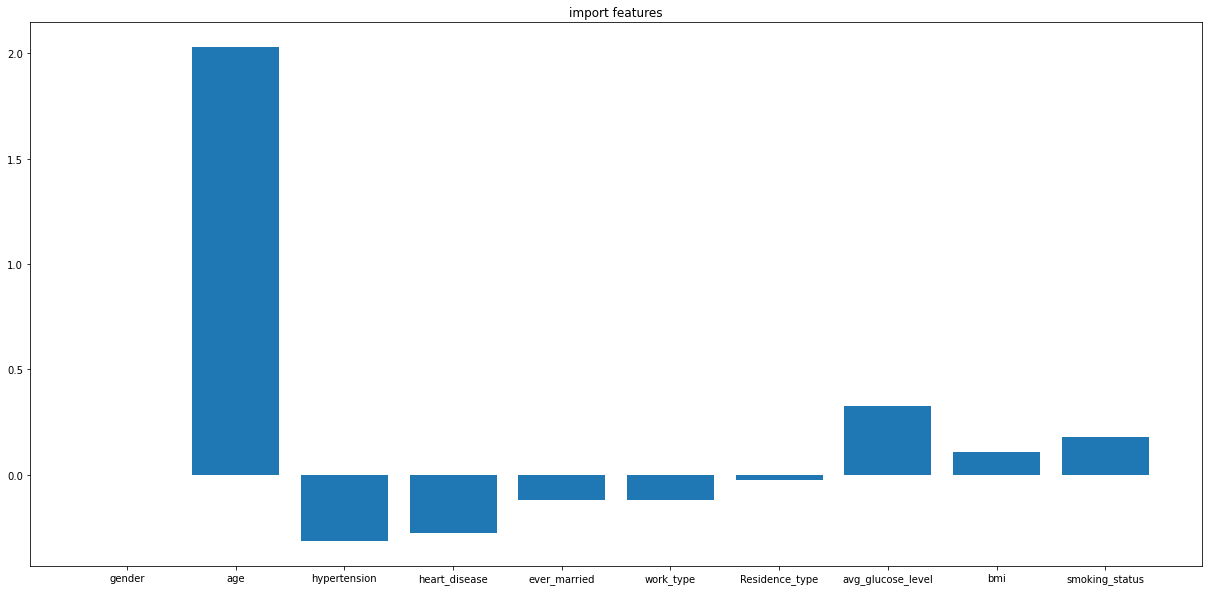

In [41]:
import matplotlib.pyplot as plt
#The horizontal coordinate is the class. The vertical is n
# len(n[0])--16
plt.figure(figsize=(21,10))
# plt.subplot(121)
plt.bar(X.columns,n[0])
plt.title('import features')
plt.show()


###  Remove the clutter

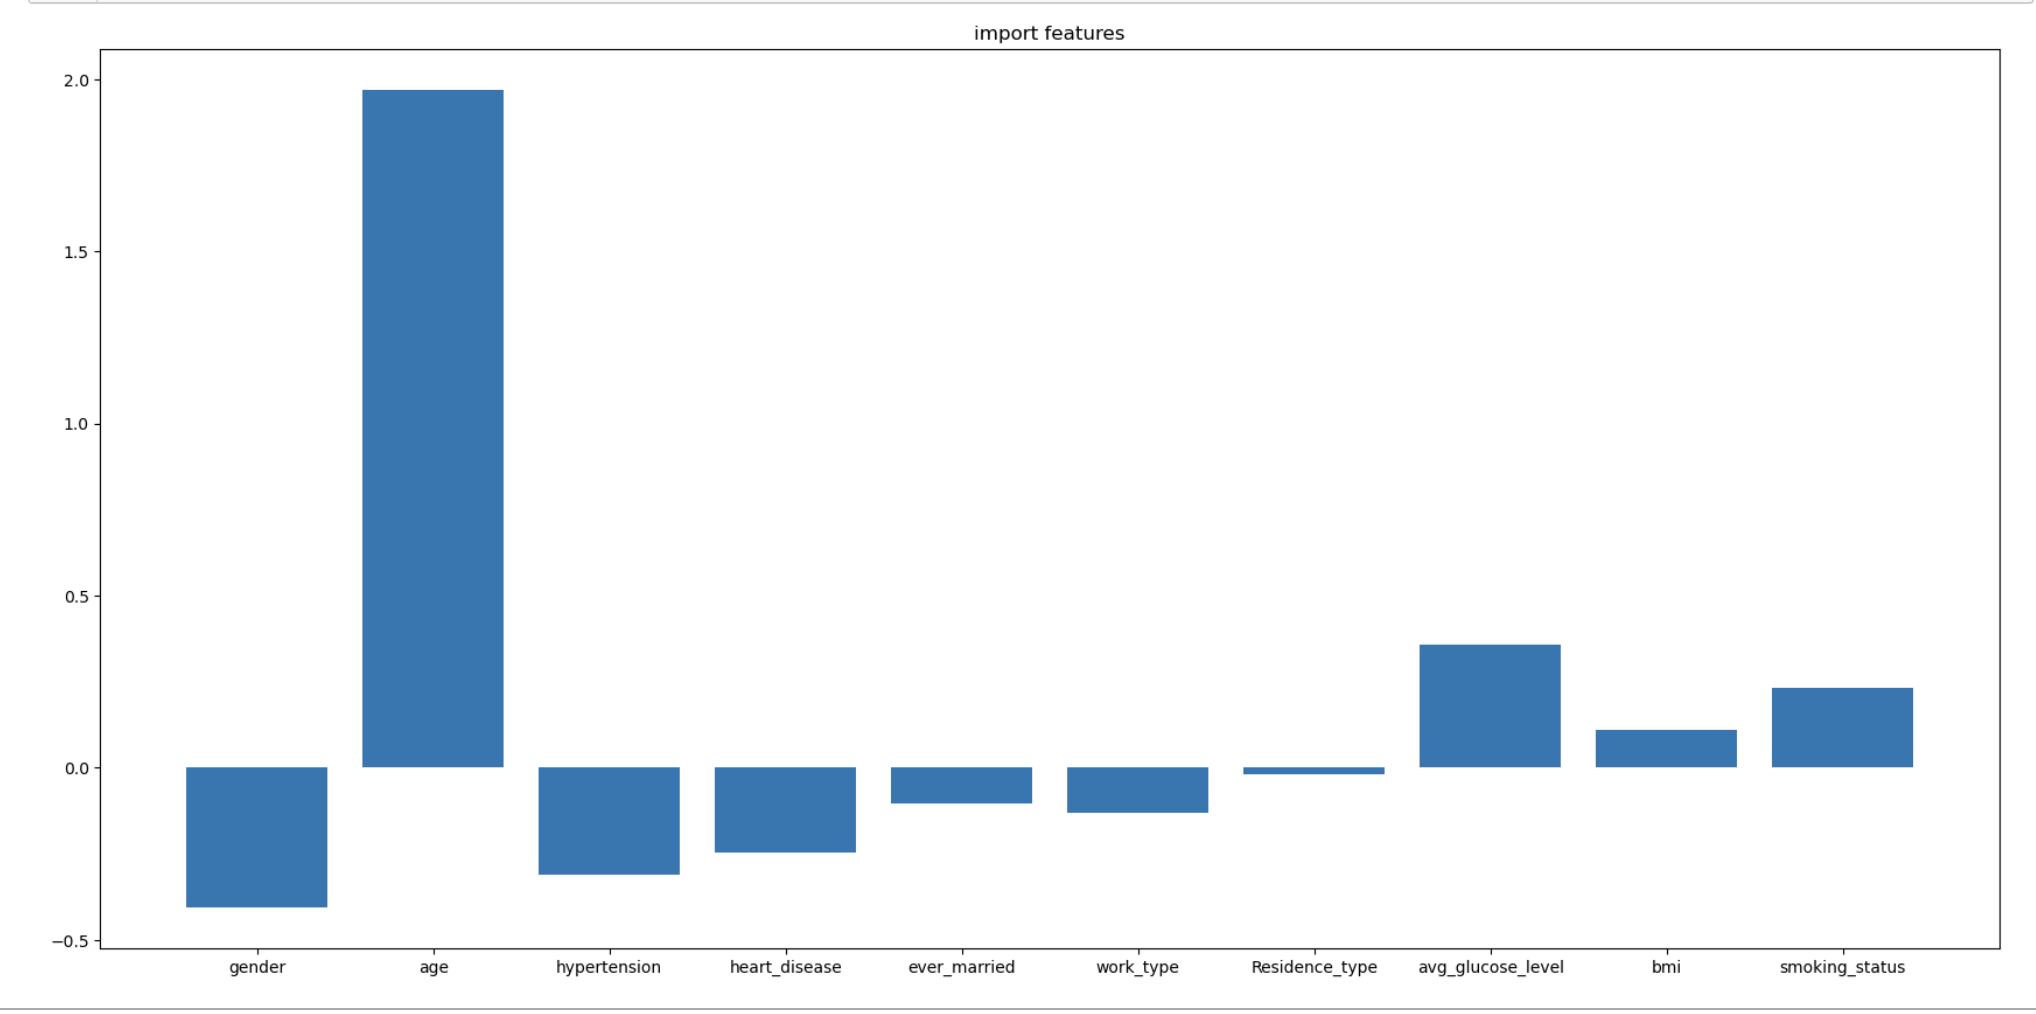

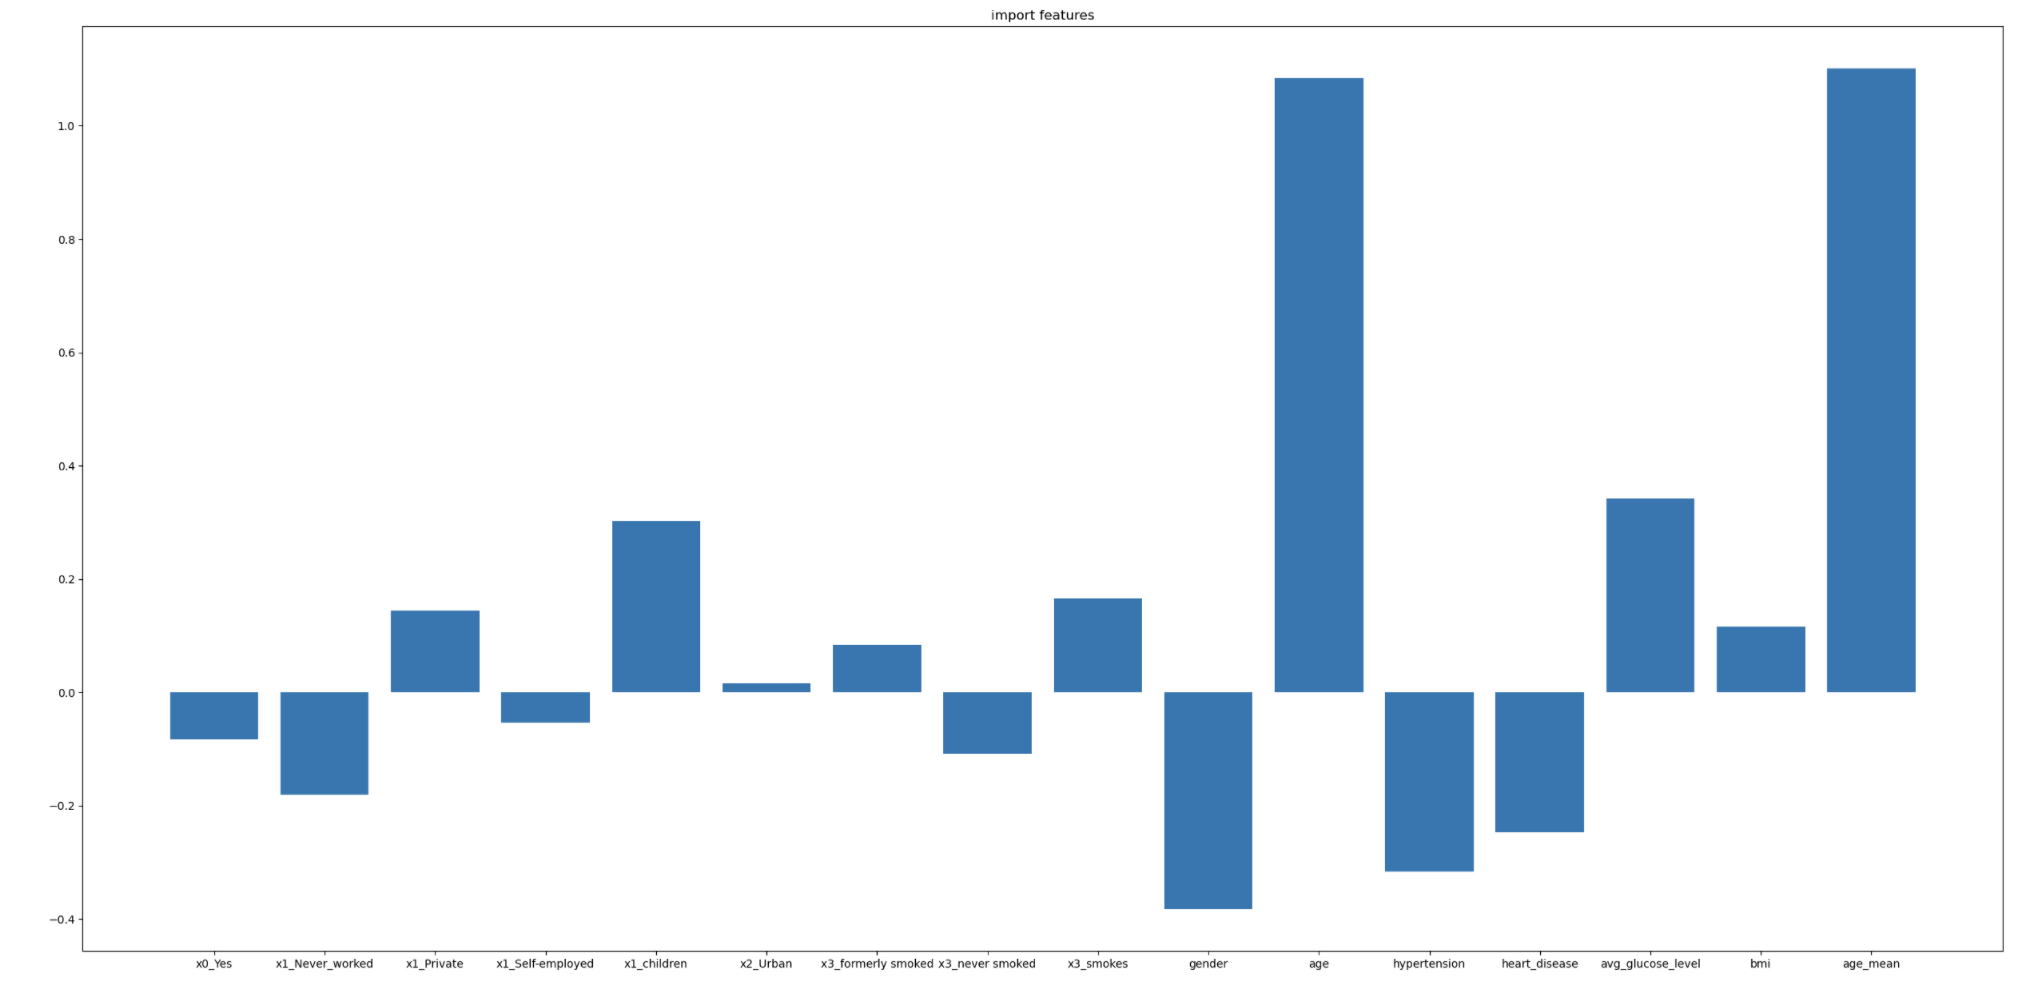

In [43]:
class_report=classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.81      0.74      0.77       803
           1       0.76      0.82      0.79       802

    accuracy                           0.78      1605
   macro avg       0.78      0.78      0.78      1605
weighted avg       0.78      0.78      0.78      1605



In [47]:
auc = roc_auc_score(y_test, y_pred)
auc

0.7813351117846729

In [48]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[593, 210],
       [141, 661]])

In [49]:
predicted_probab_log = LR.predict_proba(X_test)
predicted_probab_log = predicted_probab_log[:, 1]
fpr, tpr, _ = roc_curve(y_test, predicted_probab_log)

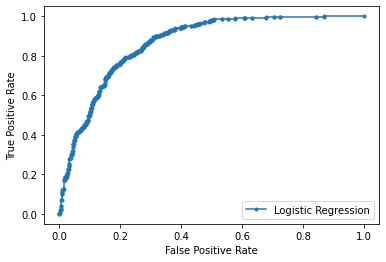

In [50]:
pyplot.plot(fpr, tpr, marker='.', label='Logistic Regression')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()